In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification , classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.isnull().sum()  #data is clear with no null values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
data = data.fillna(np.nan) #to substitute all null data

In [7]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
data.dtypes 

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
data['income'] = data['income'].map({'<=50K':0 , '>50K' : 1}) #data_formatting

In [10]:
data.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [11]:
data = data.rename(columns={'education.num':'education_num','hours.per.week':'hours_per_week','native.country':'native_country'})

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
# Data_Analysis

In [14]:
Numericals = ['age','fnlwgt','education_num','capital.gain','capital.loss','hours_per_week','income']
Categoricals = ['workclass','education','martial.status','occupation','relationship','race','sex','native.country']

In [15]:
#Data_Visualisation

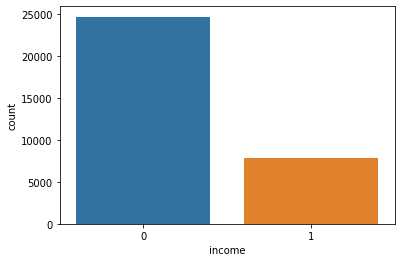

In [16]:
sns.countplot(data['income'],label='count')  # Gives Count of people with income > 50K

Text(0.5, 1, 'Relation Correspondance between Numericals and Dataset')

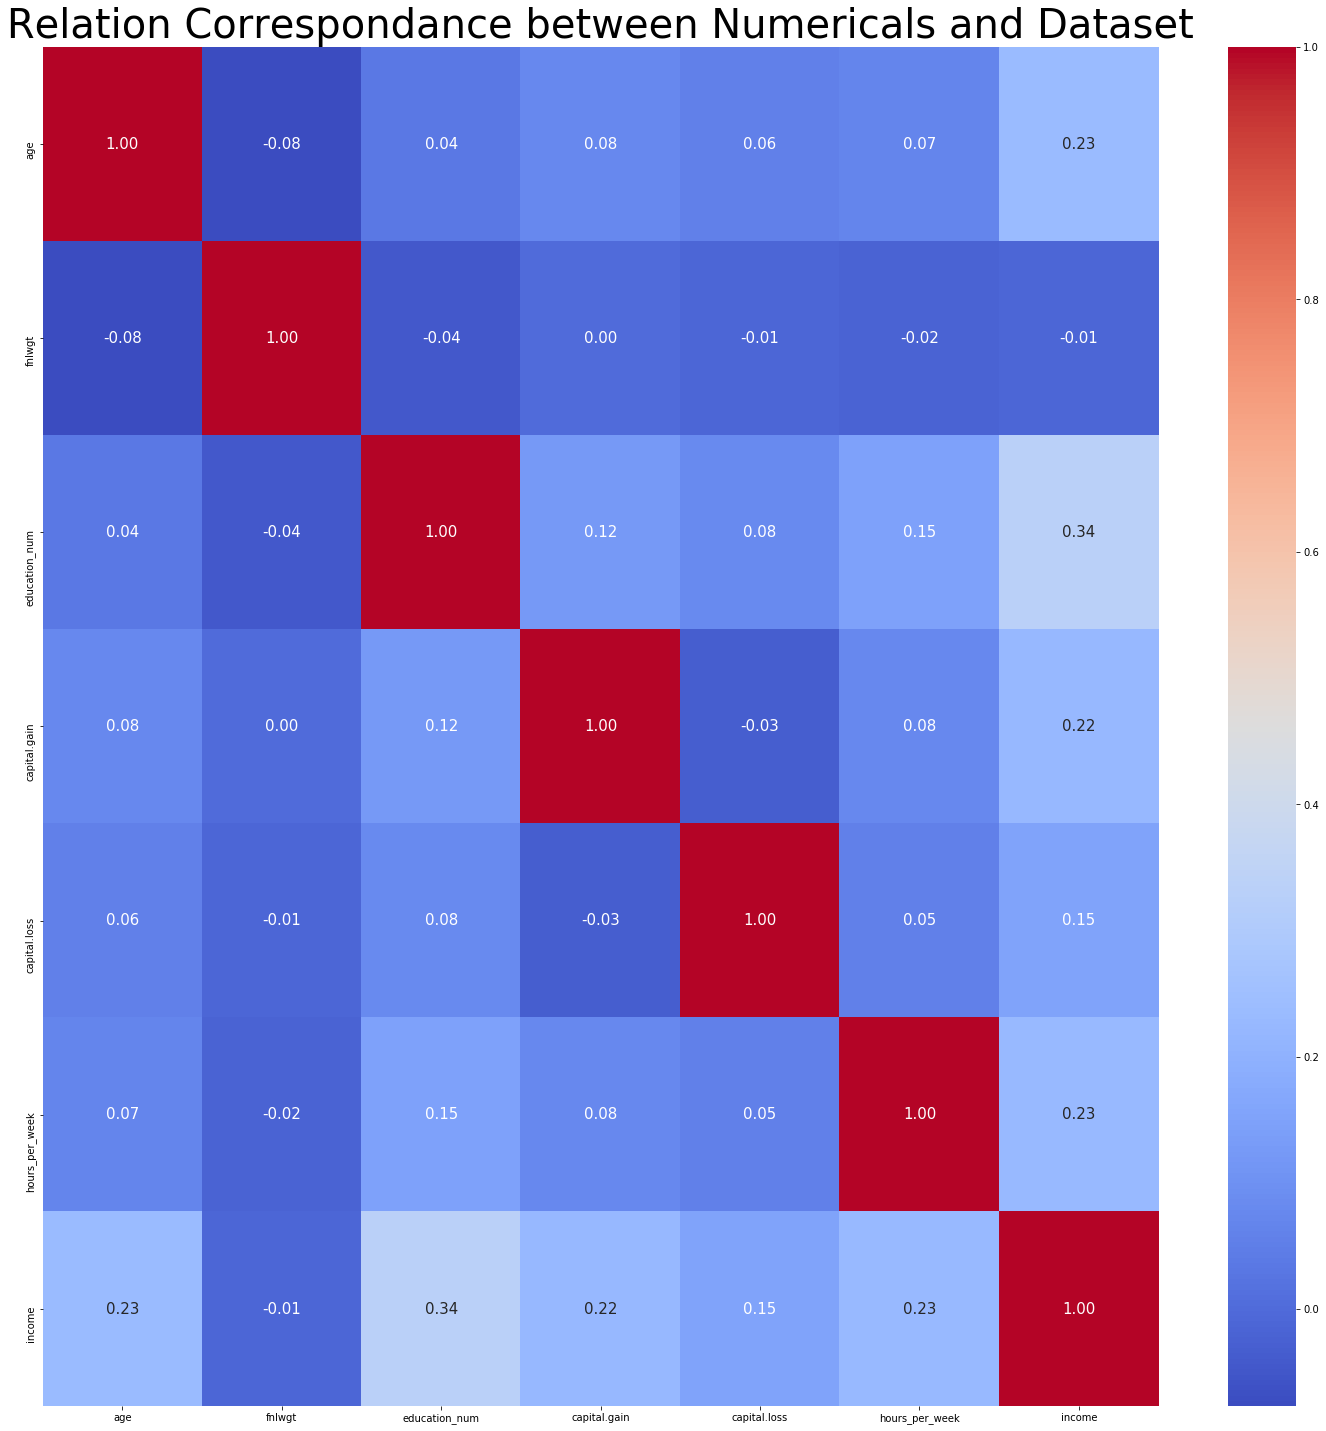

In [17]:
plt.figure(figsize = (25,25))
sns.heatmap(data[Numericals].corr(), annot=True , fmt = '.2f' ,annot_kws={'size': 15}, cmap = 'coolwarm')
plt.title('Relation Correspondance between Numericals and Dataset',size='40')

In [18]:
# Income W.R.T Hours_worked

In [19]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


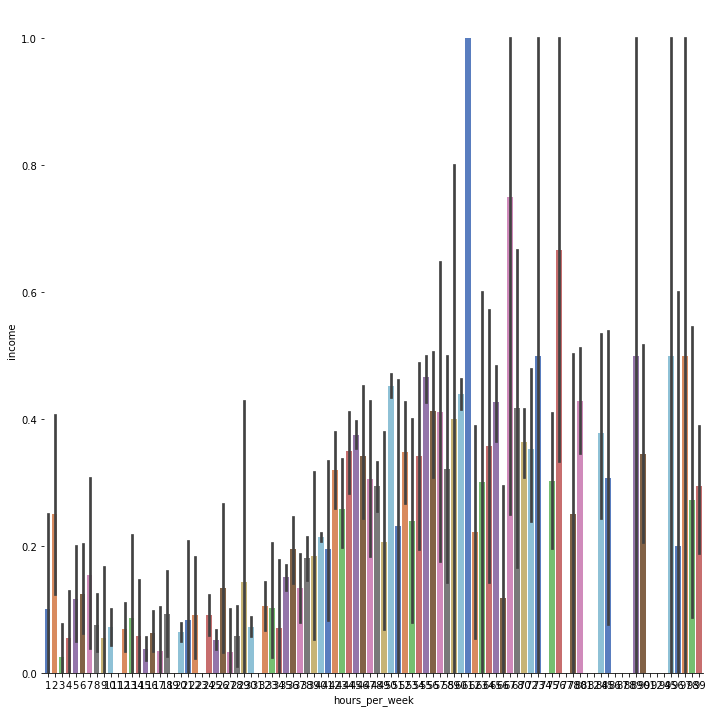

In [20]:
map = sns.factorplot(x='hours_per_week',y='income',data = data,height=10 , kind='bar' , palette = 'muted')
map.despine(left=True)


Text(0.5, 1, 'ratio correspondance of hours to Income')

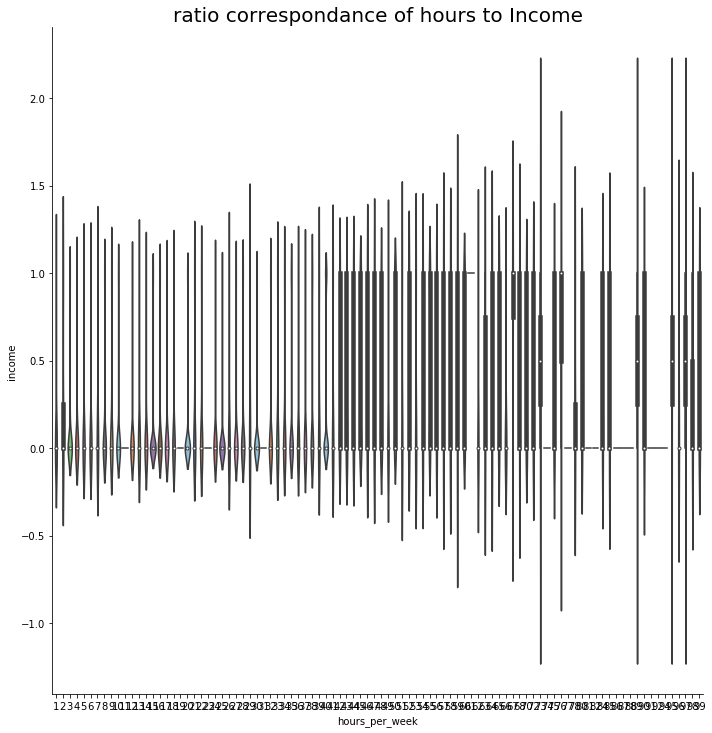

In [21]:
sns.catplot(x='hours_per_week',y='income',data = data , height = 10,palette = 'muted',kind='violin') #renamed factor_plot utilisation 
plt.title('ratio correspondance of hours to Income',size='20')

In [22]:
# Education vs Income

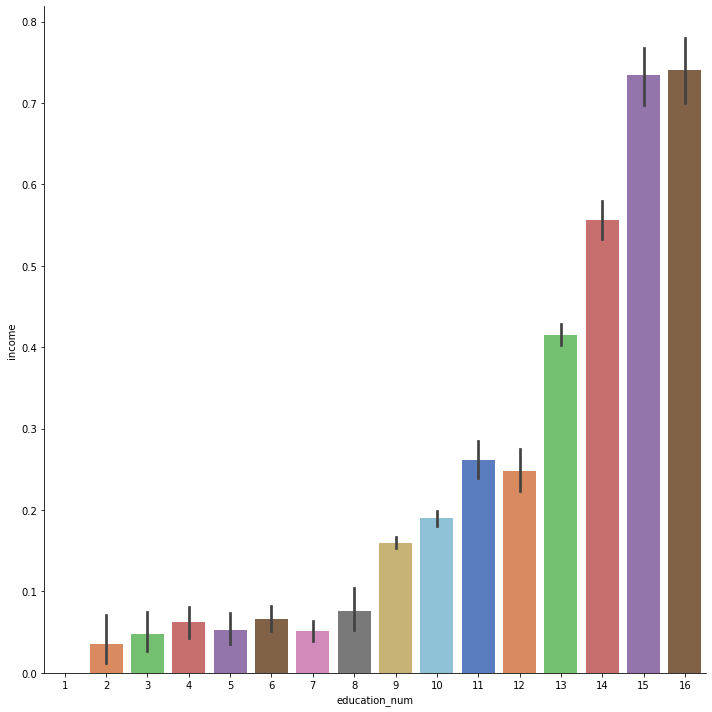

In [23]:
sns.factorplot(x = 'education_num' , y = 'income' , data = data , height = 10 , kind = 'bar' , palette = 'muted')

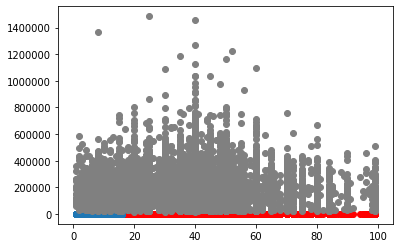

In [24]:
x = data['hours_per_week']
y = data['income']
plt.scatter(x,y,color='red')
plt.scatter(data['education_num'],y)
plt.scatter(x,data['fnlwgt'],color='grey')     # Independent Data Samples

In [25]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
data.describe()

,age,fnlwgt,education_num,capital.gain,capital.loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


<Figure size 1800x1800 with 0 Axes>

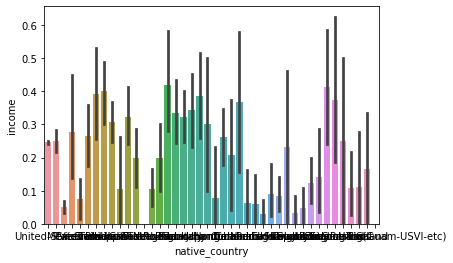

<Figure size 1800x1800 with 0 Axes>

In [27]:
sns.barplot(x = "native_country",y = "income",data = data)
plt.figure( figsize=(25,25))

In [28]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [29]:
data['sex'] = data['sex'].map({'Female':1 , 'Male':0})

In [30]:
# Income to Sex Analysis

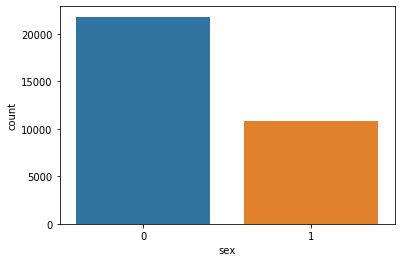

In [31]:
sns.countplot(data['sex'],label = 'income')

In [32]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [33]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [34]:
# Feature Engineering

In [35]:
data['marital.status']

0                   Widowed
1                   Widowed
2                   Widowed
3                  Divorced
4                 Separated
5                  Divorced
6                 Separated
7             Never-married
8                  Divorced
9             Never-married
10                 Divorced
11            Never-married
12                  Widowed
13                Separated
14            Never-married
15                 Divorced
16                 Divorced
17                 Divorced
18            Never-married
19                Separated
20            Never-married
21                Separated
22                 Divorced
23       Married-civ-spouse
24       Married-civ-spouse
25       Married-civ-spouse
26       Married-civ-spouse
27       Married-civ-spouse
28            Never-married
29            Never-married
                ...        
32531    Married-civ-spouse
32532             Separated
32533    Married-civ-spouse
32534         Never-married
32535    Married-civ

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [37]:
data.tail(10)

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours_per_week,native_country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,0,0,0,50,United-States,0
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,0,0,0,40,United-States,0
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,0,0,0,45,United-States,0
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,0,0,0,11,Taiwan,0
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,40,United-States,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [38]:
data.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)

In [39]:
data["marital.status"] = data["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital.status"] = data["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital.status"] = data["marital.status"].map({"Married":1, "Single":0})
data["marital.status"] = data["marital.status"].astype(int)

In [48]:
data.values

array([[    90,  77053,      9, ...,   4356,     40,      0],
       [    82, 132870,      9, ...,   4356,     18,      0],
       [    66, 186061,     10, ...,   4356,     40,      0],
       ...,
       [    40, 154374,      9, ...,      0,     40,      1],
       [    58, 151910,      9, ...,      0,     40,      0],
       [    22, 201490,      9, ...,      0,     20,      0]])

In [40]:
print(data.values[:,0:8])
print(data.values[:,8])

[[    90  77053      9 ...      0   4356     40]
 [    82 132870      9 ...      0   4356     18]
 [    66 186061     10 ...      0   4356     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
[0 0 0 ... 1 0 0]


In [49]:
x = data.values[:,0:8]
y = data.values[:,8]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=8)

In [52]:
logreg = LogisticRegression()      # Object-Creation
logreg.fit(x_train,y_train)        # Fitting the data into the object
predict = logreg.predict(x_test)  

logreg_train_score = round(logreg.score(x_train,y_train)*100,2)
logreg_test_score = round(logreg.score(x_test,y_test)*100,2)
accuracy = accuracy_score(y_test,predict)
class_report = classification_report(y_test,predict)

print('train_score ' , logreg_train_score )
print('test_score ' , logreg_test_score)
print('accuracy' , accuracy)
print('classification_report ',classification_report(y_test,predict))

train_score  80.26
test_score  79.56
accuracy 0.7956390119773614
classification_report                precision    recall  f1-score   support

           0       0.80      0.97      0.88     17286
           1       0.71      0.26      0.38      5507

    accuracy                           0.80     22793
   macro avg       0.76      0.61      0.63     22793
weighted avg       0.78      0.80      0.76     22793



In [51]:
ranforest = RandomForestClassifier(n_estimators=100)  #Random_forest prediction model
ranforest.fit(x_train,y_train)
predict = ranforest.predict(x_test)

print("train-score : " , round(ranforest.score(x_train,y_train)*100.2))
print("test-score : "  , round(ranforest.score(x_test,y_test)*100,2))
print("Accuracy-Score : " , accuracy_score(y_test,predict))
print("classification-Report : " , classification_report(y_test,predict))

train-score :  100.0
test-score :  84.12
Accuracy-Score :  0.8412231825560479
classification-Report :                precision    recall  f1-score   support

           0       0.88      0.92      0.90     17286
           1       0.71      0.59      0.64      5507

    accuracy                           0.84     22793
   macro avg       0.79      0.75      0.77     22793
weighted avg       0.83      0.84      0.84     22793

